# BRFFS PROJECT

## Background

### Prediction Question
How do socioeconomic and demographic factors influence self-reported health outcomes, mental health, and access to preventive care?

### About the data

In order to detect changes over time, we decided to take the BRFFS Survey results every few years from 1993 to 2019

## Code

### Imports

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import pyreadstat
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


### Set Up

In [ ]:
# Function to read SAS XPT file using pyreadstat
def read_xpt(file_path):
    # Use pyreadstat to read the SAS XPT file
    df, meta = pyreadstat.read_xport(file_path)  # Correct method for .xpt files
    return df

# Initialize an empty dictionary to store the data
data = {}

# # 1993 Year Data
# file_path_1993 = f"C:/Users/bridget/project/data/1993BRFFS.XPT"
# data[1993] = read_xpt(file_path_1993)
# print("1993 Data:")
# print(data[1993].head())  # Check the first few rows of 1993 data


1993 Data:
   _WTFORHT  _FRTSERV  _DRNKMO  _GRAMFAT  _POSTSTR  _FINALWT  _STATE  _STRATA  \
0   10215.0    999.99   8888.0   9999.99    985.54    985.54     1.0      1.0   
1    8713.0    999.99   8888.0   9999.99    544.25   1088.51     1.0      1.0   
2    9849.0    999.99   8888.0   9999.99    526.43    526.43     1.0      1.0   
3    9350.0    999.99   8888.0   9999.99    706.45    706.45     1.0      1.0   
4   13751.0    999.99   8888.0   9999.99    672.70   1345.41     1.0      1.0   

   _STSTR    _PSU  ...  _WT1 _AGEG_ _IMPAGE _AGEG _AGEG5YR _AGE65YR  _RACEG  \
0    11.0   297.0  ...   1.0    5.0     5.0   3.0      8.0      1.0     1.0   
1    11.0   297.0  ...   2.0    4.0     5.0   2.0      7.0      1.0     2.0   
2    11.0   297.0  ...   1.0    4.0     5.0   2.0      7.0      1.0     2.0   
3    11.0   989.0  ...   1.0    6.0     8.0   3.0     13.0      2.0     1.0   
4    11.0  2137.0  ...   2.0    2.0     2.0   1.0      2.0      1.0     1.0   

  _RACEGR  _BPCHECK  _CHOLC

In [ ]:
# # 1999 Year Data
# file_path_1999 = f"C:/Users/bridget/project/data/1999BRFFS.XPT"
# data[1999] = read_xpt(file_path_1999)
# print("1999 Data:")
# print(data[1999].head())  # Check the first few rows of 1999 data


1999 Data:
   _STATE  _GEOSTR  _DENSTR     _PSU  _RECORD     IDATE IMONTH IDAY IYEAR  \
0     1.0      1.0      1.0  10290.0      1.0  01201999     01   20  1999   
1     1.0      1.0      1.0  10992.0      1.0  01131999     01   13  1999   
2     1.0      1.0      1.0  20586.0      1.0  02271999     02   27  1999   
3     1.0      1.0      1.0  20667.0      1.0  02061999     02   06  1999   
4     1.0      1.0      1.0  20813.0      1.0  02111999     02   11  1999   

  INTVID  ...  _RFDRACU  _RFDRCHR _RFDRDRI  _RAW  _CSA  _WT1     _POSTSTR  \
0     26  ...       1.0       1.0      1.0   2.0   1.0   2.0   709.955703   
1     15  ...       1.0       1.0      1.0   2.0   1.0   2.0   919.545794   
2     60  ...       1.0       1.0      1.0   1.0   1.0   1.0  1024.247333   
3     45  ...       2.0       1.0      1.0   2.0   1.0   2.0  1190.937133   
4     98  ...       1.0       1.0      1.0   2.0   1.0   2.0  1190.937133   

      _FINALWT  EXERDIS1  EXERDIS2  
0  1419.911405       NaN  

In [ ]:
# # 2003 Year Data
# file_path_2003 = f"C:/Users/bridget/project/data/2003BRFFS.XPT"
# data[2003] = read_xpt(file_path_2003)
# print("2003 Data:")
# print(data[2003].head())  # Check the first few rows of 2003 data


2003 Data:
   _STATE  _GEOSTR  _DENSTR2  PRECALL   REPNUM  REPDEPTH  FMONTH     IDATE  \
0     1.0      1.0       2.0      1.0   6018.0       3.0     6.0  06242003   
1     1.0      1.0       1.0      1.0   5020.0      10.0     5.0  07012003   
2     1.0      1.0       2.0      1.0  11031.0      12.0    11.0  12132003   
3     1.0      1.0       1.0      1.0  12011.0      29.0    12.0  12112003   
4     1.0      1.0       2.0      1.0   9031.0      42.0     9.0  10042003   

  IMONTH IDAY  ... _RFPAREC _RFNOPA  _AIDSTST  _HIGHRSK  _STDCNDM  _RFHLTH  \
0     06   24  ...      9.0     1.0       NaN       NaN       NaN      9.0   
1     07   01  ...      2.0     1.0       NaN       NaN       NaN      2.0   
2     12   13  ...      9.0     1.0       NaN       NaN       NaN      1.0   
3     12   11  ...      1.0     1.0       1.0       1.0       NaN      1.0   
4     10   04  ...      3.0     2.0       NaN       NaN       NaN      2.0   

   _FV5SRV  _CHLDCNT  _EDUCAG  _INCOMG  
0      1.0

In [ ]:
# # 2009 Year Data
# file_path_2009 = f"C:/Users/bridget/project/data/2009BRFFS.XPT"
# data[2009] = read_xpt(file_path_2009)
# print("2009 Data:")
# print(data[2009].head())  # Check the first few rows of 2009 data


2009 Data:
   _STATE  _GEOSTR  _DENSTR2  PRECALL    REPNUM  REPDEPTH  FMONTH     IDATE  \
0     1.0      8.0       1.0      1.0  120095.0      15.0    12.0  12232009   
1     1.0      9.0       2.0      1.0  120111.0      22.0    12.0  12232009   
2     1.0     15.0       1.0      1.0   30148.0       1.0     3.0  03162009   
3     1.0     15.0       1.0      1.0  120185.0       2.0    12.0  12212009   
4     1.0      7.0       1.0      1.0   20070.0      10.0     2.0  03032009   

  IMONTH IDAY  ... _POSTCH _CHILDWT  _RAWHH     _WT2HH   _POSTHH    _HOUSEWT  \
0     12   23  ...     NaN      NaN     1.0  78.304330  5.156850  403.803705   
1     12   23  ...     NaN      NaN     1.0  83.531721  6.249416  522.024516   
2     03   16  ...     NaN      NaN     1.0  27.371489  5.266431  144.150062   
3     12   21  ...     NaN      NaN     1.0  27.371489  5.266431  144.150062   
4     03   03  ...     NaN      NaN     1.0  19.684375  4.906784   96.586972   

   POPSIZE  CT10000  KEEPCHIM  KE

In [ ]:
# # 2013 Year Data
# file_path_2013 = f"C:/Users/bridget/project/data/2013BRFFS.XPT"
# data[2013] = read_xpt(file_path_2009)
# print("2013 Data:")
# print(data[2013].head())  # Check the first few rows of 2013 data


2013 Data:
   _STATE  _GEOSTR  _DENSTR2  PRECALL    REPNUM  REPDEPTH  FMONTH     IDATE  \
0     1.0      8.0       1.0      1.0  120095.0      15.0    12.0  12232009   
1     1.0      9.0       2.0      1.0  120111.0      22.0    12.0  12232009   
2     1.0     15.0       1.0      1.0   30148.0       1.0     3.0  03162009   
3     1.0     15.0       1.0      1.0  120185.0       2.0    12.0  12212009   
4     1.0      7.0       1.0      1.0   20070.0      10.0     2.0  03032009   

  IMONTH IDAY  ... _POSTCH _CHILDWT  _RAWHH     _WT2HH   _POSTHH    _HOUSEWT  \
0     12   23  ...     NaN      NaN     1.0  78.304330  5.156850  403.803705   
1     12   23  ...     NaN      NaN     1.0  83.531721  6.249416  522.024516   
2     03   16  ...     NaN      NaN     1.0  27.371489  5.266431  144.150062   
3     12   21  ...     NaN      NaN     1.0  27.371489  5.266431  144.150062   
4     03   03  ...     NaN      NaN     1.0  19.684375  4.906784   96.586972   

   POPSIZE  CT10000  KEEPCHIM  KE

In [28]:
# 2019 Year Data
file_path_2019 = f"C:/Users/bridget/project/data/2019BRFFS.XPT"
data[2019] = read_xpt(file_path_2019)
print("2019 Data:")
print(data[2019].head())  # Check the first few rows of 2019 data


2019 Data:
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  01182019     01   18  2019    1100.0  2019000001   
1     1.0     1.0  01132019     01   13  2019    1100.0  2019000002   
2     1.0     1.0  01182019     01   18  2019    1100.0  2019000003   
3     1.0     1.0  01182019     01   18  2019    1200.0  2019000004   
4     1.0     1.0  01042019     01   04  2019    1100.0  2019000005   

           _PSU  CTELENM1  ...  _VEGESU1  _FRTLT1A  _VEGLT1A  _FRT16A  \
0  2.019000e+09       1.0  ...     114.0       1.0       1.0      1.0   
1  2.019000e+09       1.0  ...     121.0       1.0       1.0      1.0   
2  2.019000e+09       1.0  ...     164.0       1.0       1.0      1.0   
3  2.019000e+09       1.0  ...       NaN       9.0       9.0      1.0   
4  2.019000e+09       1.0  ...     178.0       1.0       1.0      1.0   

   _VEG23A  _FRUITE1  _VEGETE1  _FLSHOT7  _PNEUMO3  _AIDTST4  
0      1.0       0.0       0.0       2.0       1.0       2.0

In [ ]:
# # test
# df_1993 = data[1993]
# print(df_1993.head())

   _WTFORHT  _FRTSERV  _DRNKMO  _GRAMFAT  _POSTSTR  _FINALWT  _STATE  _STRATA  \
0   10215.0    999.99   8888.0   9999.99    985.54    985.54     1.0      1.0   
1    8713.0    999.99   8888.0   9999.99    544.25   1088.51     1.0      1.0   
2    9849.0    999.99   8888.0   9999.99    526.43    526.43     1.0      1.0   
3    9350.0    999.99   8888.0   9999.99    706.45    706.45     1.0      1.0   
4   13751.0    999.99   8888.0   9999.99    672.70   1345.41     1.0      1.0   

   _STSTR    _PSU  ...  _WT1 _AGEG_ _IMPAGE _AGEG _AGEG5YR _AGE65YR  _RACEG  \
0    11.0   297.0  ...   1.0    5.0     5.0   3.0      8.0      1.0     1.0   
1    11.0   297.0  ...   2.0    4.0     5.0   2.0      7.0      1.0     2.0   
2    11.0   297.0  ...   1.0    4.0     5.0   2.0      7.0      1.0     2.0   
3    11.0   989.0  ...   1.0    6.0     8.0   3.0     13.0      2.0     1.0   
4    11.0  2137.0  ...   2.0    2.0     2.0   1.0      2.0      1.0     1.0   

  _RACEGR  _BPCHECK  _CHOLCHK  
0     

In [ ]:
# # Inspecting the structure, if no year in columns then need to add that
# df_1993.info() 
# print(df_1993.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102263 entries, 0 to 102262
Columns: 197 entries, _WTFORHT to _CHOLCHK
dtypes: float64(191), object(6)
memory usage: 153.7+ MB
            _WTFORHT       _FRTSERV        _DRNKMO       _GRAMFAT  \
count  102263.000000  102263.000000  102261.000000  102263.000000   
mean    14140.009661     775.321199    4632.960073    9175.738685   
std     15520.806306     416.330870    4451.756344    2744.999271   
min      4737.000000       0.000000       1.000000       0.000000   
25%     10001.000000     999.990000       8.000000    9999.990000   
50%     11112.000000     999.990000    8888.000000    9999.990000   
75%     12501.000000     999.990000    8888.000000    9999.990000   
max     99999.000000     999.990000    9999.000000    9999.990000   

            _POSTSTR       _FINALWT         _STATE        _STRATA  \
count  102263.000000  102263.000000  102263.000000  102263.000000   
mean     1004.911062    1846.257060      28.362741       1.0810

### Data Cleaning

In [ ]:

def clean_data(df):

    df_cleaned = df.copy()

    # Drop columns with more than 50% missing values
    df_cleaned = df_cleaned.dropna(axis=1, thresh=len(df_cleaned) * 0.5)  # Drop columns with too many missing values

    # Impute missing values for categorical columns 
    df_cleaned['_SEX'] = df_cleaned['_SEX'].fillna(df_cleaned['_SEX'].mode()[0])
    df_cleaned['_AGEG5YR'] = df_cleaned['_AGEG5YR'].fillna(df_cleaned['_AGEG5YR'].mode()[0])
    df_cleaned['_INCOMG'] = df_cleaned['_INCOMG'].fillna(df_cleaned['_INCOMG'].mode()[0])
    df_cleaned['_RFHLTH'] = df_cleaned['_RFHLTH'].fillna(df_cleaned['_RFHLTH'].mode()[0])
    df_cleaned['_PA30022'] = df_cleaned['_PA30022'].fillna(df_cleaned['_PA30022'].mode()[0])
    df_cleaned['_TOTINDA'] = df_cleaned['_TOTINDA'].fillna(df_cleaned['_TOTINDA'].mode()[0])
    df_cleaned['_FRUITE1'] = df_cleaned['_FRUITE1'].fillna(df_cleaned['_FRUITE1'].mode()[0])
    df_cleaned['_VEGESU1'] = df_cleaned['_VEGESU1'].fillna(df_cleaned['_VEGESU1'].mode()[0])
    df_cleaned['_RFBING5'] = df_cleaned['_RFBING5'].fillna(df_cleaned['_RFBING5'].mode()[0])

    # Handle Duplicates
    df_cleaned = df_cleaned.drop_duplicates()

    # Convert Data Types (if needed)
    df_cleaned['_SEX'] = df_cleaned['_SEX'].astype('category')
    df_cleaned['_AGEG5YR'] = df_cleaned['_AGEG5YR'].astype('category')
    df_cleaned['_INCOMG'] = df_cleaned['_INCOMG'].astype('category')
    df_cleaned['_RFHLTH'] = df_cleaned['_RFHLTH'].astype('category')
    df_cleaned['_PA30022'] = df_cleaned['_PA30022'].astype('category')
    df_cleaned['_TOTINDA'] = df_cleaned['_TOTINDA'].astype('category')
    df_cleaned['_FRUITE1'] = df_cleaned['_FRUITE1'].astype('category')
    df_cleaned['_VEGESU1'] = df_cleaned['_VEGESU1'].astype('category')
    df_cleaned['_RFBING5'] = df_cleaned['_RFBING5'].astype('category')

    return df_cleaned


In [77]:
# 2019 Data
data_2019 = data.get(2019)
if data_2019 is not None:
    cleaned_data_2019 = clean_data(data_2019)
    data[2019] = cleaned_data_2019
    print("Cleaned Data for 2019:")
    print(cleaned_data_2019.head())
else:
    print("Data for 2019 is not available.")

Cleaned Data for 2019:
   _STATE  FMONTH     IDATE IMONTH IDAY IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  01182019     01   18  2019    1100.0  2019000001   
1     1.0     1.0  01132019     01   13  2019    1100.0  2019000002   
2     1.0     1.0  01182019     01   18  2019    1100.0  2019000003   
3     1.0     1.0  01182019     01   18  2019    1200.0  2019000004   
4     1.0     1.0  01042019     01   04  2019    1100.0  2019000005   

           _PSU  SAFETIME  ...  _VEGRES1  _FRUTSU1  _VEGESU1  _FRTLT1A  \
0  2.019000e+09       NaN  ...       1.0     200.0     114.0       1.0   
1  2.019000e+09       NaN  ...       1.0     100.0     121.0       1.0   
2  2.019000e+09       NaN  ...       1.0     114.0     164.0       1.0   
3  2.019000e+09       NaN  ...       0.0       NaN     200.0       9.0   
4  2.019000e+09       NaN  ...       1.0     143.0     178.0       1.0   

   _VEGLT1A  _FRT16A  _VEG23A  _FRUITE1  _VEGETE1  _AIDTST4  
0       1.0      1.0      1.0       0.0    

### Exploratory Data Analysis (EDA)

In [80]:
print("Summary Statistics:")
print(cleaned_data_2019.describe())

Summary Statistics:
              _STATE         FMONTH       DISPCODE          _PSU  SAFETIME  \
count  418268.000000  418268.000000  418268.000000  4.182680e+05  268327.0   
mean       29.619266       6.539609    1117.441688  2.019005e+09       1.0   
std        16.153650       3.337855      37.946802  3.653318e+03       0.0   
min         1.000000       1.000000    1100.000000  2.019000e+09       1.0   
25%        18.000000       4.000000    1100.000000  2.019002e+09       1.0   
50%        27.000000       7.000000    1100.000000  2.019004e+09       1.0   
75%        42.000000       9.000000    1100.000000  2.019007e+09       1.0   
max        72.000000      12.000000    1200.000000  2.019017e+09       1.0   

       CTELNUM1  CELLFON5   CADULT1        CELLSEX       PVTRESD3  ...  \
count  268327.0  268327.0  268324.0  268318.000000  268327.000000  ...   
mean        1.0       1.0       1.0       1.501863       1.004271  ...   
std         0.0       0.0       0.0       0.499997     

In [81]:
# Missing Values Check
print("\nMissing Values:")
print(cleaned_data_2019.isnull().sum())


Missing Values:
_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_FRT16A         0
_VEG23A         0
_FRUITE1        0
_VEGETE1        0
_AIDTST4    40291
Length: 179, dtype: int64


In [82]:
# Distribution of Key Variables (Sex, Age Group, Income, etc.)
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

C:\Users\bridget\AppData\Local\Temp\ipykernel_29532\2285179899.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_AGEG5YR', data=cleaned_data_2019, palette='Set2')


Text(0.5, 0, 'Age Group')

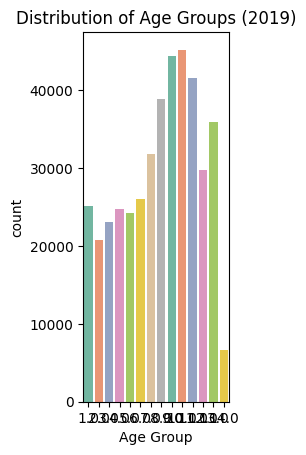

In [84]:
# Plot Distribution of Age Group (_AGEG5YR)
plt.subplot(1, 3, 1)
sns.countplot(x='_AGEG5YR', data=cleaned_data_2019, palette='Set2')
plt.title('Distribution of Age Groups (2019)')
plt.xlabel('Age Group')



Age Group Distribution (2019):

The age distribution appears to be fairly balanced across different age groups, though older age groups seem to have fewer respondents.

Implication for the Overall Question: Age is likely a crucial factor in determining health status, as health tends to decline with age. You might need to examine age-related health differences more closely in your analysis. Age groups can also be important predictors when combined with other factors, like income and physical activity.

C:\Users\bridget\AppData\Local\Temp\ipykernel_29532\362935307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_INCOMG', data=cleaned_data_2019, palette='Set3')


Text(0.5, 0, 'Income Group')

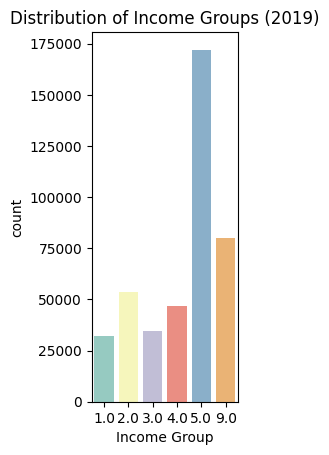

In [85]:
# Plot Distribution of Income Group (_INCOMG)
plt.subplot(1, 3, 2)
sns.countplot(x='_INCOMG', data=cleaned_data_2019, palette='Set3')
plt.title('Distribution of Income Groups (2019)')
plt.xlabel('Income Group')



Income Distribution (2019):

The income distribution shows a larger proportion in middle-income groups (3.0, 4.0), with fewer people in very low or very high-income groups.

Implication for the Overall Question: Income could have a significant impact on health status, as it often correlates with access to healthcare, lifestyle choices, and living conditions. Understanding how income groups interact with health status would be essential for building a comprehensive model.

C:\Users\bridget\AppData\Local\Temp\ipykernel_29532\2216257031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_RFHLTH', data=cleaned_data_2019, palette='Set1')


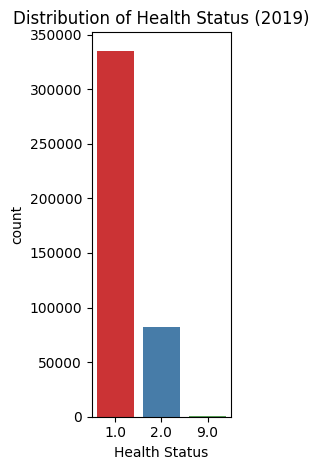

In [86]:
# Plot Distribution of Health Status (_RFHLTH)
plt.subplot(1, 3, 3)
sns.countplot(x='_RFHLTH', data=cleaned_data_2019, palette='Set1')
plt.title('Distribution of Health Status (2019)')
plt.xlabel('Health Status')

plt.tight_layout()
plt.show()



Health Status Distribution (2019):

The distribution of health status shows a large majority of respondents in the "good health" category (1.0), with a smaller proportion in "fair health" (2.0) and very few in "unknown" or missing data (9.0).

Implication for the Overall Question: Since most individuals report being in good health, this class will dominate any predictions. The imbalance between the 1.0 and 2.0 health statuses means the model could be biased towards predicting good health, and more focus should be placed on improving the prediction for fair and unknown health statuses.

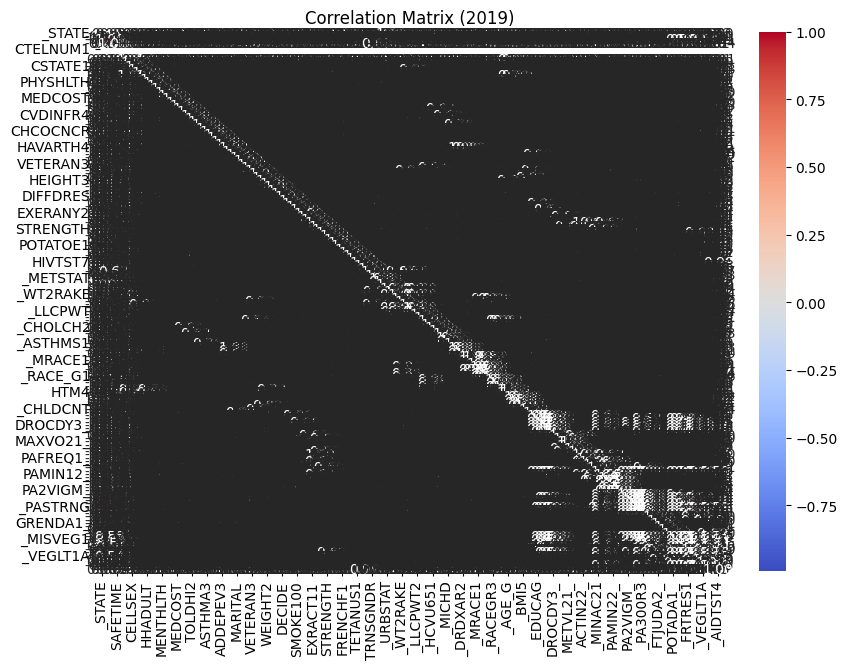

In [87]:
# Correlation Heatmap for Numeric Variables
numeric_cols = cleaned_data_2019.select_dtypes(include='number').columns
correlation_matrix = cleaned_data_2019[numeric_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix (2019)')
plt.show()



Too convoluted to tell

In [88]:
# Analyze Categorical Variables (e.g., Health, Gender)
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

C:\Users\bridget\AppData\Local\Temp\ipykernel_29532\3989185124.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_SEX', data=cleaned_data_2019, palette='Set2')


Text(0.5, 0, 'Gender')

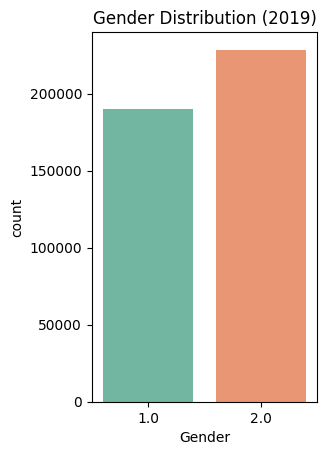

In [89]:
# Plot Sex Distribution (_SEX)
plt.subplot(1, 2, 1)
sns.countplot(x='_SEX', data=cleaned_data_2019, palette='Set2')
plt.title('Gender Distribution (2019)')
plt.xlabel('Gender')

Gender Distribution (2019):

The gender distribution plot shows a fairly balanced representation between male (1.0) and female (2.0) respondents.

Implication for the Overall Question: Gender might not significantly influence health status alone but could interact with other factors (like income or physical activity) to affect general health outcomes. It could be useful to check for gender-specific patterns in health status or in responses to other features.

C:\Users\bridget\AppData\Local\Temp\ipykernel_29532\3877204043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='_FRUITE1', data=cleaned_data_2019, palette='Set3')


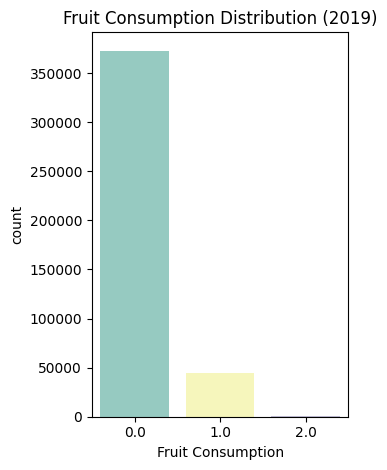

In [90]:
# Plot Fruit Consumption Distribution (_FRUITE1)
plt.subplot(1, 2, 2)
sns.countplot(x='_FRUITE1', data=cleaned_data_2019, palette='Set3')
plt.title('Fruit Consumption Distribution (2019)')
plt.xlabel('Fruit Consumption')

plt.tight_layout()
plt.show()

Fruit Consumption Distribution (2019):

The distribution shows a high concentration of responses at 0 for fruit consumption, indicating that most individuals report minimal or no fruit consumption.

Implication for the Overall Question: Fruit consumption may not be as significant as physical activity in predicting health status. However, it could still play a role in overall health, especially if other dietary habits are explored.

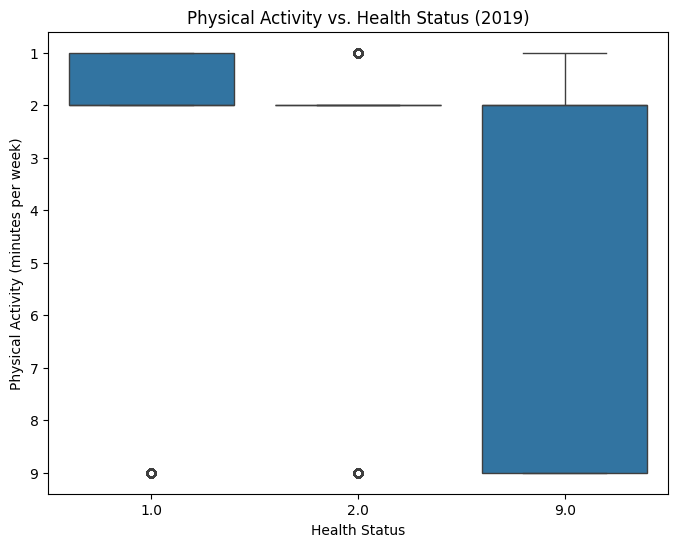

In [91]:
# Boxplot of Physical Activity vs. Health Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='_RFHLTH', y='_PA30022', data=cleaned_data_2019)
plt.title('Physical Activity vs. Health Status (2019)')
plt.xlabel('Health Status')
plt.ylabel('Physical Activity (minutes per week)')
plt.show()


Physical Activity vs. Health Status (2019):

Physical Activity (_PA30022) is visualized against Health Status (_RFHLTH).

From the plot, you can see that individuals with better health status (1.0) tend to have low or moderate physical activity. In contrast, individuals with worse health status (9.0) seem to have much higher levels of physical activity. This suggests a possible inverse relationship between physical activity and perceived health status.

Implication for the Overall Question: Physical activity is likely a strong predictor of health status. However, the outlier values (with higher physical activity and worse health) might suggest that health conditions other than physical activity, such as mental health or underlying chronic conditions, play an important role.

### Feature Engineering and Modeling

Accuracy Score: 0.9975494297941521

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     67030
         2.0       0.99      1.00      0.99     16399
         9.0       1.00      0.09      0.16       225

    accuracy                           1.00     83654
   macro avg       1.00      0.70      0.72     83654
weighted avg       1.00      1.00      1.00     83654


Cross-validation scores: [0.99762115 0.99780046 0.99777656 0.99789607 0.99764503]
Mean CV Score: 0.9977478555504922


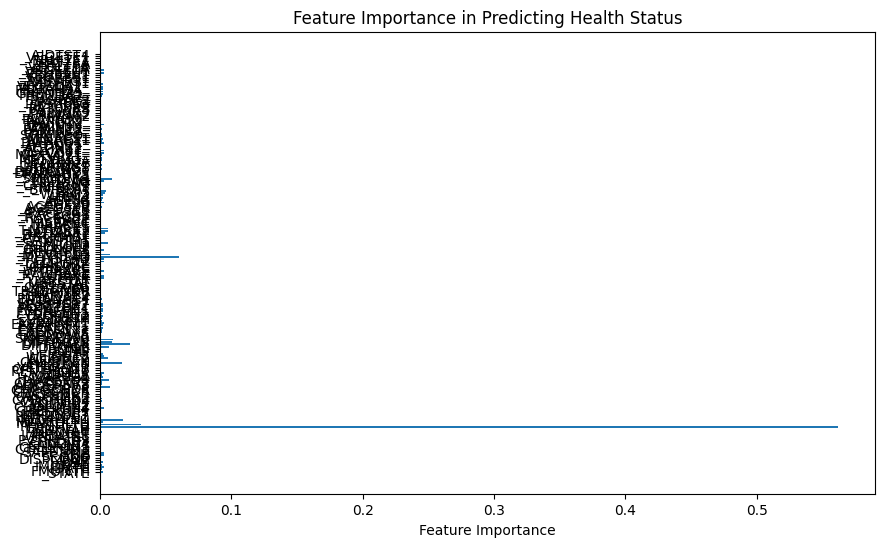

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


df_cleaned = cleaned_data_2019 

# Set the target variable
target = '_RFHLTH'  # General Health status (categorical)
X = df_cleaned.drop(target, axis=1)  # Features
y = df_cleaned[target]  # Target

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation (to evaluate model stability)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Feature Importance (optional, to check which features are most important)
importances = rf_model.feature_importances_
features = X.columns

# Plot feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Health Status')
plt.show()


##  Results for Model with all variables
High Accuracy: The model performs very well overall with a 99.75% accuracy score, but this is driven by the high performance on the majority classes (1.0 and 2.0).

Class Imbalance Issue: The performance on the minority class (9.0) is very poor, with only 9% recall. This suggests a class imbalance, where the model is biased towards the majority classes and struggles with the minority class.

Macro Average vs. Weighted Average: The macro average shows the model’s performance across all classes equally, while the weighted average reflects the performance based on the number of instances of each class. The disparity between the macro and weighted averages highlights the class imbalance.

Overall I feel like includsing all the variables was too much and made it difficult for me to see how each variable seemed to effect general health. So I am doing this again while concentrating on key variables

Accuracy Score: 0.7724675448872738

Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.91      0.87     67030
         2.0       0.37      0.22      0.27     16399
         9.0       0.00      0.00      0.00       225

    accuracy                           0.77     83654
   macro avg       0.40      0.38      0.38     83654
weighted avg       0.73      0.77      0.75     83654


Cross-validation scores: [0.77416501 0.77173835 0.77467904 0.77191493 0.77404277]
Mean CV Score: 0.7733080210335578


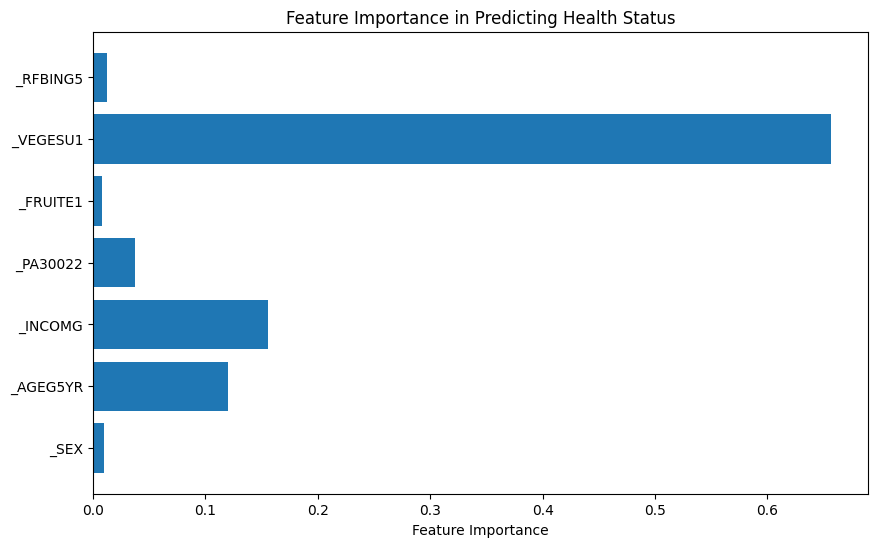

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Assuming `cleaned_data_2019` is your cleaned dataframe for 2019 data
df_cleaned = cleaned_data_2019

# Select specific features (columns) for modeling
features = ['_SEX', '_AGEG5YR', '_INCOMG', '_PA30022', '_FRUITE1', '_VEGESU1', '_RFBING5']
target = '_RFHLTH'  # General Health status (categorical)

# Prepare the feature set (X) and target variable (y)
X = df_cleaned[features]  # Selected features
y = df_cleaned[target]  # Target variable (health status)

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Cross-validation (to evaluate model stability)
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# Feature Importance (optional, to check which features are most important)
importances = rf_model.feature_importances_
features_selected = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_selected, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Health Status')
plt.show()


### Interpretation of Feature Importance Plot:

1. **`_VEGESU1` (Vegetable Consumption)**:
   - This feature has the highest importance in predicting health status, with an importance score of **~0.6**. This suggests that **vegetable consumption** is a **strong predictor** of health status. People who consume more vegetables may be reported to be in **better health**.
   
2. **`_RFBING5` (Binge Drinking Behavior)**:
   - The **binge drinking behavior** feature has the second-highest importance score. This suggests that **binge drinking** is also a significant factor in predicting health status. The more frequent the binge drinking behavior, the more likely it is associated with **worse health**.

3. **`_FRUITE1` (Fruit Consumption)**:
   - Fruit consumption also plays a role in predicting health status, though with a lower importance score (~0.1). This reinforces the idea that a healthy diet, including both fruits and vegetables, contributes to **better health** outcomes.

4. **`_PA30022` (Physical Activity)**:
   - Physical activity appears to be a moderately important feature in predicting health status. People who engage in physical activity tend to report **better health**, but the feature importance is lower than that of vegetable consumption and binge drinking behavior.

5. **`_INCOMG` (Income Group)**:
   - Income is also a moderately important predictor of health. Higher-income groups might have better access to healthcare and resources that promote health, but this feature has less impact compared to physical activity and diet.

6. **`_AGEG5YR` (Age Group)**:
   - Age group is another relevant feature. However, it is the **second least important** feature in the model, suggesting that **age**, while important, might not be as significant a factor in health status prediction when compared to **lifestyle choices** like physical activity, diet, and binge drinking.

7. **`_SEX` (Gender)**:
   - Gender is the **least important** feature in this model, indicating that **sex** does not have a strong impact on the prediction of health status once other features like physical activity and diet are taken into account.



### Insights in Terms of the Overall Question:

1. **Physical Activity and Diet**: The model suggests that **dietary habits (vegetable and fruit consumption)** and **physical activity** are strong predictors of health status. This supports the notion that maintaining a healthy diet and an active lifestyle are crucial factors for **general health**.
   
2. **Binge Drinking**: **Binge drinking** behavior is also a significant predictor, highlighting the negative effects of excessive alcohol consumption on health.

3. **Income and Age**: **Income** and **age** have some predictive power but are less significant compared to lifestyle factors. This indicates that while socioeconomic factors like income can influence health, **lifestyle choices** (physical activity, diet) may play a more substantial role.

4. **Gender**: The fact that **gender** has low importance suggests that it does not drastically influence the health status in this dataset when considering lifestyle and demographic factors. However, it might still have importance in other contexts (e.g., gender-specific health issues).

## Criticisms and Concerns
I wanted to do every 5 years, but I messed up and only realized quite late in the process that it was 6 and 4 years instead of 5. years = 1993, 1999, 2003, 2009, 2013, 2019, 2023 instead of 1993, 1998, 2003, 2008, 2013, 2018, 2023.


For some reason 2023 was the data file that wouldn't be converted. Every time I tried there was an error. It could be a corrupted file.

In the end every year had a slightly different system of variables and I couldn't find what the variable was called in the earlier years due to lack of documentation, so I decided to focus on 2019 and forgoe the initial idea of seeing how the question changed over the years